## Tutorial 4: ABC for image reconstruction

In [34]:
import plotly.io as pio
# Set Plotly to render plots as interactive in notebooks
pio.renderers.default = "notebook"

In [35]:
import numpy as np
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import Image as IPImage
from io import BytesIO

In [36]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_data = datasets.FashionMNIST(root='../_static/MNISTdata', train=True, download=True, transform=transform)

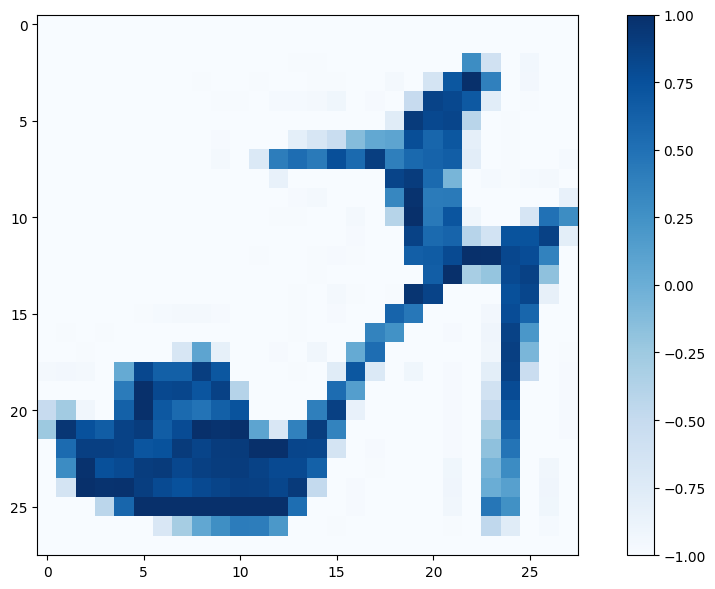

In [37]:
image_index = 9
real_image = train_data[image_index][0].squeeze().numpy()
fig, ax = plt.subplots(figsize=(10, 6))
cax = ax.imshow(real_image, cmap='Blues')
fig.colorbar(cax)
fig.tight_layout()

In [38]:
target = real_image.flatten().copy()

def reconstruction_error(x,target=target):
    """_summary_
    Args:
        x (numpy array): the solution to the optimization problem
    Returns:
        float: the reconstruction error
    """
    return np.sum((x - target) ** 2)

In [42]:
from beeoptimal import ArtificialBeeColony

abc = ArtificialBeeColony(
    n_bees=250,
    function=reconstruction_error,
    bounds=np.array([(0.0, 1.0)] * 784)
    )


abc.optimize(verbose=True,mutation='ABC/best/1',max_iters=2000)

Running Optimization: 100%|██████████|[00:26<00:00]


In [43]:
# List to store plotly figures
plots = []
# Adaptive step in order to have gifs with same number of frames
step = max(1, (abc.actual_iters + 1) // 50)  # Note: actual_iters +1 to include initial population
# Generate plotly frames
for iteration in range(0, (abc.actual_iters + 1), step): 
    fig, ax = plt.subplots(figsize=(10,6))
    cax = ax.imshow(abc.optimal_bee_history[iteration].position.reshape(28, 28), cmap='Blues')
    fig.colorbar(cax)
    ax.set_title(f"Iteration {iteration}")
    fig.tight_layout()
    plt.close(fig)
    plots.append(fig)
    
images = []
for fig in plots:
    # Save each figure to a BytesIO object in memory instead of a file
    img_buf = BytesIO()
    #fig.write_image(img_buf, format="png", scale=3)  # Save the Plotly figure as PNG into the buffer
    fig.savefig(img_buf, format="png",dpi=200)       # Matplotlib version
    img_buf.seek(0)  # Rewind the buffer to the start
    images.append(Image.open(img_buf))  # Open the image from the buffer
    
# Create the GIF
#gif_path = tempfile.mktemp(suffix=".gif")
gif_path = '../_static/image_reconstruction.gif'
images[0].save(gif_path, save_all=True, append_images=images[1:], duration=200, loop=0)
IPImage(url=gif_path)
